In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_path = 'per_imgs/train'
val_path = 'per_imgs/val'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size = (256, 256), 
                         classes = ['per', 'no_per'], batch_size = 10)

val_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = val_path, target_size = (256, 256), 
                         classes = ['per', 'no_per'], batch_size = 10)

Found 2207 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [7]:
imgs, labels = next(train_batches)

In [8]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape=(256, 256, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 524290    
Total params: 543,682
Trainable params: 543,682
Non-trainable params: 0
__________________________________________________

In [10]:
# another option is to use binary_crossentropy and using sigmoid
# as the activation function for the output layer, which will 
# result in one output node

In [11]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(x = train_batches, validation_data = val_batches, epochs = 2,
                             callbacks=[keras.callbacks.ModelCheckpoint('models5/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
                                                               save_best_only=True)])

Epoch 1/2
100/221 [============>.................] - ETA: 1:19 - loss: 0.0425 - accuracy: 0.9990

KeyboardInterrupt: 

In [22]:
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path, target_size = (256, 256), 
                         classes = ['per', 'no_per'], batch_size = 10, shuffle = False)
some_test_batches = ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = some_test_path, target_size = (256, 256), 
                         classes = ['per', 'no_per'], batch_size = 10, shuffle = False)

Found 104 images belonging to 2 classes.
Found 203 images belonging to 2 classes.


In [23]:
test_imgs, test_labels = next(test_batches)
some_test_imgs, some_test_labels = next(some_test_batches)

In [26]:
predictions = model.predict(x = test_batches, verbose = 0)
some_predictions = model.predict(x = some_test_batches, verbose = 0)

In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_true=test_batches.classes, y_pred = np.argmax(predictions, axis = -1))
some_cm = confusion_matrix(y_true=some_test_batches.classes, y_pred = np.argmax(some_predictions, axis = -1))

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
some_test_batches.class_indices

{'per': 0, 'no_per': 1}

Confusion matrix, without normalization
[[69 81]
 [ 7 46]]


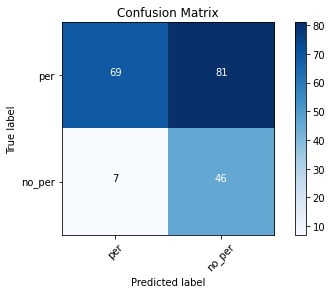

In [54]:
cm_plot_labels = ['per', 'no_per']
plot_confusion_matrix(cm = some_cm, classes = cm_plot_labels, title = 'Confusion Matrix')